# Teil 3: Textanalyse

In diesem Teil der Analyse nehmen wir uns die Songtexte vor, worum geht es in den Songs, wie komplex sind die Texte, welche Stimmung herrscht vor? 

Wir haben die Songauswahl der 10.000 Hits aus df1 mit den Songtexten aus df2 zusammengeführt und etwa 6000 Songs bekommen, die Teil der Analyse aus Teil 2 sind. Jetzt schauen wir uns ihre Texte an.

Im zweiten Teil vergleichen wir die Texte der großen Menge Songs von df2 mit den ausgewählten Hits aus df1.

In [16]:
import pandas as pd

df3 = pd.read_csv('df_merged.csv')

In [17]:
df3.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5999 entries, 0 to 5998
Data columns (total 38 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Track URI             5999 non-null   object 
 1   Track Name            5999 non-null   object 
 2   Artist URI(s)         5999 non-null   object 
 3   Artist Name(s)        5999 non-null   object 
 4   Album URI             5999 non-null   object 
 5   Album Name            5999 non-null   object 
 6   Album Artist URI(s)   5999 non-null   object 
 7   Album Artist Name(s)  5999 non-null   object 
 8   Album Release Date    5999 non-null   object 
 9   Album Image URL       5999 non-null   object 
 10  Disc Number           5999 non-null   int64  
 11  Track Number          5999 non-null   int64  
 12  Track Duration (ms)   5999 non-null   int64  
 13  Track Preview URL     5989 non-null   object 
 14  Explicit              5999 non-null   bool   
 15  Popularity           

In [18]:
#df3.head()

## Textanalyse Schritt für Schritt

Zuerst installieren wir Spacy und suchen ein passendes Sprachmodell aus. Da die Texte größtenteils auf englisch sind, nehmen wir das Modell en_core_web_md, das ein gutes Gleichgewicht zwischen akkuraten Ergebnissen und Geschwindigkeit liefern soll.
Leider war das große Modell zu langsam für die Analyse, deshalb nehmen wir das Mittlere.

In [19]:
#!pip install spacy
#!python -m spacy download en_core_web_md
#!python -m spacy download en_core_web_sm

Jetzt laden wir das Modell und lassen den Text erstmal automatisch vorverarbeiten, hier werden Tokens erstellt, die Wörter in Lemmas zerlegt und Stoppwörter, sowie Satzzeichen entfernt.

In [20]:
# import pandas as pd
# import spacy

# # Lade das mittlere englische Modell
# nlp = spacy.load('en_core_web_md')

# def preprocess_text(texts):
#     # Verarbeite die Texte in Batches
#     processed_texts = []
#     for doc in nlp.pipe(texts, batch_size=32, n_process=-1):  # n_process=-1 verwendet alle verfügbaren Kerne
#         # Lemmatisierung und Entfernen von Stoppwörtern und Satzzeichen
#         processed_texts.append(' '.join([token.lemma_ for token in doc if not token.is_stop and not token.is_punct]))
#     return processed_texts

# # Vorverarbeitung der Lyrics
# df3['processed_lyrics'] = preprocess_text(df3['lyrics'].tolist())  # Konvertiere die Serie in eine Liste

# print(df3[['Track Name', 'processed_lyrics']].head())


In [21]:
# # Funktion zur Überprüfung des Vorverarbeitungsprozesses
# def check_preprocessing(original_text, processed_text):
#     original_doc = nlp(original_text)
#     processed_doc = nlp(processed_text)
    
#     # Extrahiere Tokens und Stoppwörter
#     original_tokens = [token.text for token in original_doc]
#     processed_tokens = [token.text for token in processed_doc]
#     stopwords_in_original = [token.text for token in original_doc if token.is_stop]
    
#     return {
#         "original_tokens": original_tokens,
#         "processed_tokens": processed_tokens,
#         "stopwords_in_original": stopwords_in_original
#     }

# # Überprüfe einige Beispiele
# for index in range(5):  # Überprüfe die ersten 5 Songs
#     original = df3['lyrics'].iloc[index]
#     processed = df3['processed_lyrics'].iloc[index]
#     result = check_preprocessing(original, processed)
    
#     print(f"Track Name: {df3['Track Name'].iloc[index]}")
#     print("Original Tokens:", result['original_tokens'][:100])  # Zeige nur die ersten 10 Tokens
#     print("\nProcessed Tokens:", result['processed_tokens'][:10])  # Zeige nur die ersten 10 Tokens
#     print("\nStoppwörter im Originaltext:", result['stopwords_in_original'][:5])  # Zeige nur die ersten 5 Stoppwörter
#     print("\n" + "="*250 + "\n")

Schauen wir uns den vorverarbeiteten Text an, im zweiten Song "Riptide" wurden die Wörter und Zeilenumbrüche in Tokens umgewandelt und in eine Liste gepackt. Es wurden folgende Stoppwörter entfernt: ['I', 'was', 'of', 'and', 'the']

Die übrigen Wörter wurden weiterverarbeitet, dabei wurden sie lemmatisiert, also in ihren Urzustand gebracht. 
So wird also aus 
"I was scared of dentists and the dark 
I was scared of pretty girls and starting conversations"

['scared', 'dentist', 'dark', '\n  ', 'scared', 'pretty', 'girl', 'start', 'conversation', '\n  ']

## Allgemeine Analyse des Textes

Fangen wir mit der Analyse an, erstmal schauen wir uns die Häufigkeitsverteilung an, gibt es bestimmte Wörter, die immer wieder vorkommen?

In [22]:
# from collections import Counter
# import matplotlib.pyplot as plt

# # Zähle die häufigsten Wörter
# def get_word_frequencies(text_series):
#     all_words = ' '.join(text_series).split()
#     word_counts = Counter(all_words)
#     return word_counts.most_common(30)  # Die 30 häufigsten Wörter

# # Häufigkeit der Wörter in den vorverarbeiteten Lyrics
# top_words = get_word_frequencies(df3['processed_lyrics'])

# # Ergebnisse anzeigen
# print("Häufigste Wörter:", top_words)

# # Optional: Visualisierung der häufigsten Wörter
# words, counts = zip(*top_words)
# plt.figure(figsize=(10, 4))
# plt.bar(words, counts)
# plt.xlabel('Wörter')
# plt.ylabel('Häufigkeit')
# plt.title('Häufigste Wörter in den Songtexten')
# plt.xticks(rotation=45)
# plt.show()


![Mein Plot](D:/_code/0_DA/Abschlussprojekt/data/textanalyse_1.png)

Die hier am häufigsten Vorkommenden Wörter sind nur teilweise aussagekräftig, "oh", "yeah", "like", "♪" und "let" können meiner Meinung nach aus dem Text verschwinden, allerdings behalten wir im Hinterkopf, dass yeah und like drin waren, vielleicht brauchen wir sie später noch mal.
Außerdem sind doppeldeutige Wörter wie 'want' und 'wanna' und 'na' und 'no' in den Texten, ich werde sie per Hand ersetzen.
Die störenden Wörter fügen wir zur Stoppwortliste dazu:

In [23]:
additional_stopwords = ['oh', 'ooh', 'to', 'na', 'yeah', 'like', 'know', 'get', 'come', 'let', '♪', 'na', 'to', 'ooh']

Und versuchen es noch mal:

In [24]:
# import pandas as pd
# import spacy
# from collections import Counter
# import matplotlib.pyplot as plt

# # Lade das mittlere englische Modell
# nlp = spacy.load('en_core_web_md')

# # Zusätzliche Stoppwörter definieren
# additional_stopwords = ['oh', 'ooh', 'to', 'na', 'yeah', 'like', 'know', 'get', 'come', 'let', '♪', 'na', 'to']

# # Füge die zusätzlichen Stoppwörter zu SpaCy hinzu
# for word in additional_stopwords:
#     nlp.vocab[word].is_stop = True

# def preprocess_text(text):
#     # Konvertiere den Text in Kleinbuchstaben
#     #text = text.lower()
#     # Ersetze 'wanna' durch 'want' und 'na' durch 'no'
#     text = text.replace('wanna', 'want').replace('na', 'no').replace("'cause", 'because').replace('gonno', 'gonna')
#     doc = nlp(text)
#     # Lemmatisierung und Entfernen von Stoppwörtern und Satzzeichen
#     return ' '.join([token.lemma_ for token in doc if not token.is_stop and not token.is_punct])

# # Vorverarbeitung der Lyrics
# df3['processed_lyrics'] = df3['lyrics'].apply(preprocess_text)

# #print(df3[['Track Name', 'processed_lyrics']].head())

# # Zähle die häufigsten Wörter
# def get_word_frequencies(text_series):
#     all_words = ' '.join(text_series).split()
#     word_counts = Counter(all_words)
#     return word_counts.most_common(30)  # Die 30 häufigsten Wörter

# # Häufigkeit der Wörter in den vorverarbeiteten Lyrics
# top_words = get_word_frequencies(df3['processed_lyrics'])

# # Ergebnisse anzeigen
# print("Häufigste Wörter:", top_words)


In [25]:
# words, counts = zip(*top_words)
# plt.figure(figsize=(10, 6))
# plt.bar(words, counts)
# plt.xlabel('Wörter')
# plt.ylabel('Häufigkeit')
# plt.title('Häufigste Wörter in den Songtexten')
# plt.xticks(rotation=45)
# plt.savefig('textanalyse_2.png')  # Speichert den Plot als PNG-Datei
# plt.show()


![Mein Plot](D:/_code/0_DA/Abschlussprojekt/data/textanalyse_2.png)

In [26]:
# from wordcloud import WordCloud

# # Erstelle eine Wortwolke
# wordcloud = WordCloud(width=800, height=400, background_color='white').generate_from_frequencies(dict(top_words))

# # Visualisiere die Wortwolke
# plt.figure(figsize=(10, 5))
# plt.imshow(wordcloud, interpolation='bilinear')
# plt.axis('off')  # Keine Achsen anzeigen
# plt.title('Wortwolke der häufigsten Wörter in den Songtexten')
# plt.savefig('wordcloud_2.png')  # Speichert den Plot als PNG-Datei
# plt.show()

![Mein Plot](D:/_code/0_DA/Abschlussprojekt/data/wordcloud_2.png)

Da sich trotz Stoppwörterliste immer noch Wörter wie 'oh', 'yeah' und 'la' einschleichen, werden wir sie "per Hand" löschen, also eine eigene Liste mit ungewollten Wörtern anlegen, die nach dem preprocessing gelöscht werden.

In [27]:
import pandas as pd
import spacy
from collections import Counter

# Lade das mittlere englische Modell
nlp = spacy.load('en_core_web_md')

# Zusätzliche Stoppwörter definieren
additional_stopwords = ['oh', 'ooh', 'to', 'na', 'yeah', 'like', 'know', 'get', 'come', 'let', '♪']

# Füge die zusätzlichen Stoppwörter zu SpaCy hinzu
for word in additional_stopwords:
    nlp.vocab[word].is_stop = True

def preprocess_text(text):
    # Ersetze 'wanna' durch 'want' und 'na' durch 'no'
    text = text.replace('wanna', 'want').replace('na', 'no').replace("'cause", 'because')
    doc = nlp(text)
    # Lemmatisierung und Entfernen von Stoppwörtern und Satzzeichen
    return ' '.join([token.lemma_ for token in doc if not token.is_stop and not token.is_punct])

# Vorverarbeitung der Lyrics
df3['processed_lyrics'] = df3['lyrics'].apply(preprocess_text)

# Definiere eine Liste von unerwünschten Wörtern
unwanted_words = ['oh', 'yeah', 'la']

# Entferne unerwünschte Wörter aus den verarbeiteten Lyrics
df3['processed_lyrics'] = df3['processed_lyrics'].apply(
    lambda x: ' '.join([word for word in x.split() if word not in unwanted_words])
)

# Zähle die häufigsten Wörter
def get_word_frequencies(text_series):
    all_words = ' '.join(text_series).split()
    word_counts = Counter(all_words)
    return word_counts.most_common(100)  # Die 100 häufigsten Wörter

# Häufigkeit der Wörter in den vorverarbeiteten Lyrics
top_words = get_word_frequencies(df3['processed_lyrics'])

# Ergebnisse anzeigen
print("Häufigste Wörter:", top_words)

Häufigste Wörter: [('love', 24728), ('want', 19940), ('get', 17155), ('baby', 11647), ('feel', 10507), ('time', 9812), ('way', 8388), ('tell', 7689), ('girl', 7357), ('need', 7216), ('gonno', 6992), ('come', 6969), ('think', 6855), ('night', 6618), ('go', 6578), ('good', 6488), ("'cause", 6335), ('right', 6310), ('hey', 6303), ('look', 5831), ('heart', 5805), ('life', 5794), ('day', 5786), ('away', 5456), ('thing', 5363), ('ah', 5072), ('say', 4890), ('leave', 4569), ('will', 4431), ('let', 4320), ('be', 4196), ('run', 4165), ('find', 4056), ('dance', 4039), ('ya', 3948), ('man', 3934), ('little', 3863), ('hold', 3856), ('world', 3690), ('tonight', 3681), ('try', 3658), ('to', 3641), ('mind', 3549), ('uh', 3515), ('turn', 3506), ('eye', 3496), ('hand', 3369), ('long', 3346), ('da', 3314), ('lose', 3247), ('boy', 3201), ('know', 3200), ('stop', 3184), ('hear', 3125), ('well', 3109), ('fall', 3104), ('Baby', 3098), ('break', 3071), ('Ooh', 3017), ('walk', 3005), ('light', 2995), ('home',

Das sieht schon besser aus. Jetzt erstellen wir zum Überblick eine einfache Wortwolke.

In [28]:
# import pandas as pd
# import spacy
# from collections import Counter
# from wordcloud import WordCloud
# import matplotlib.pyplot as plt

# # Lade das große englische Modell
# nlp = spacy.load('en_core_web_md')

# # Definiere eine Funktion zur Zählung der häufigsten Wörter
# def get_word_frequencies(text_series):
#     all_words = ' '.join(text_series).split()
#     word_counts = Counter(all_words)
#     return word_counts

# # Häufigkeit der Wörter in den vorverarbeiteten Lyrics
# word_counts = get_word_frequencies(df3['processed_lyrics'])

# # Filtere Wörter, die mehr als 100 Mal vorkommen
# filtered_word_counts = {word: count for word, count in word_counts.items() if count > 100}

# # Sortiere die gefilterten Wörter nach Häufigkeit und wähle die obersten 100 aus
# top_100_word_counts = dict(sorted(filtered_word_counts.items(), key=lambda item: item[1], reverse=True)[:100])

# # Erstelle die Wortwolke
# wordcloud = WordCloud(width=800, height=400, background_color='white').generate_from_frequencies(top_100_word_counts)

# # Visualisiere die Wortwolke
# plt.figure(figsize=(10, 5))
# plt.imshow(wordcloud, interpolation='bilinear')
# plt.axis('off')  # Achsen ausblenden
# plt.savefig('wordcloud_3.png')  # Speichert den Plot als PNG-Datei
# plt.show()


![Mein Plot](D:/_code/0_DA/Abschlussprojekt/data/wordcloud_3.png)

In [29]:
# print("Wörter, die mehr als 500 Mal vorkommen:")
# # Filtere die Wörter, die mehr als 500 Mal vorkommen
# filtered_words = {word: count for word, count in filtered_word_counts.items() if count > 500}

# # Sortiere die gefilterten Wörter nach der Anzahl (count) in absteigender Reihenfolge
# sorted_word_counts = sorted(filtered_words.items(), key=lambda item: item[1], reverse=True)

# # Erstelle eine formatierte Ausgabe
# output = " | ".join([f"{word}: {count}" for word, count in sorted_word_counts])
# print(output)


## Themen-Analyse

Als nächstes probieren wir eine Themen-Analyse mit einer Latent Dirichlet Allocation (LDA) und Non-negative Matrix Factorization (NMF), 

Die LDA sieht sich die Verteilung der Wörter an und versucht daraus Rückschlüsse über die Themen zu finden, indem es sich die Songs als einzelne "Dokumente" ansieht und nach gemeinsam vorkommenden Wörtern sucht. 
Es wird angenommen, dass Themen Gruppen von Wörtern sind, die häufig zusammen vorkommen. Und, dass jedes Dokument eine Mischung von Themen enthält. 

Als erstes legt die LDA eine Menge von Themen fest z.B. fünf Themen. Dann legt es zufällig eine Mischung der Themen fest, z.B. 20% Thema 1, 40% Thema 2 usw. und sammelt Wörter zu den Themen. 
Es werden Gruppen von oft zusammen vorkommenen Wörtern gefunden, diese werden dann als gemeinsame Themen erkannt. 
Dieser Prozess wird immer wieder wiederholt, bis die Verteilung immer genauer wird.

Die NMF zerlegt eine TF-IDF in zwei Matrizen und untersuche Häufigkeit und Gewichtung von Themen im Dokument. 

In [30]:
#!pip install gensim nltk
#!pip install pyLDAvis

#!pip install scikit-learn

In [31]:
import gensim
from gensim import corpora
import nltk
#nltk.download('stopwords')
from nltk.corpus import stopwords

# Erstelle eine Liste von Listen von Wörtern
texts = [lyrics.split() for lyrics in df3['processed_lyrics']]

# Erstelle ein Wörterbuch und ein Korpus
dictionary = corpora.Dictionary(texts)
corpus = [dictionary.doc2bow(text) for text in texts]

corpora.Dictionary(texts) erstellt ein Wörterbuch, das jedem einzigartigen Wort in den Texten eine eindeutige ID zuweist.

dictionary.doc2bow(text) konvertiert jeden Text in eine Bag-of-Words-Darstellung, die eine Liste von (Wort-ID, Häufigkeit)-Tupeln ist. Dies ist die Form, die LDA benötigt.

Jetzt führen wir die Analyse durch, dabei lege ich fest, dass 3 Themen erkannt werden sollen und 15 Durchläufe zum Lernen benutzt werden.

In [32]:
# from gensim.models import LdaModel

# # Anzahl der Themen
# num_topics = 3

# # LDA-Modell erstellen
# lda_model = LdaModel(corpus, num_topics=num_topics, id2word=dictionary, passes=15)

# # Themen anzeigen
# for idx, topic in lda_model.print_topics(-1):
#     print(f'Thema {idx + 1}: {topic}')

Wir sehen, Thema 1 ist eher aktiv mit "love, good, get, want, girl, dance, feel", Thema 2 ist eher der Liebe gewidmet: "love, want, feel, get, time, way, night, heart" und Thema 3: "get, want, baby, girl" ist auch eher der Liebe gewidmet.
Beim nächsten Versuch probieren wir es mit 5 Themen und 20 Durchläufen

In [33]:
# from gensim.models import LdaModel

# # Anzahl der Themen
# num_topics = 5

# # LDA-Modell erstellen
# lda_model = LdaModel(corpus, num_topics=num_topics, id2word=dictionary, passes=20)

# # Themen anzeigen
# for idx, topic in lda_model.print_topics(-1):
#     print(f'Thema {idx + 1}: {topic}')


Thema 1 ist eher aktiv, positiv mit "run, good, play, want"
<br>Thema 2 ist positiv mit Liebe verbunden: "get, baby, want, dance, girl, let, come, love, to, feel"
<br>Thema 3 ist eher ruhiger und mit Liebe verbunden: "love, want, feel, time, heart"
<br>Thema 5 ist eher mit körperlichen Dingen verbunden

Und nun noch 10 Themen und 30 Durchläufe:

In [34]:
from gensim.models import LdaModel

# Anzahl der Themen
num_topics = 10

# LDA-Modell erstellen
lda_model = LdaModel(corpus, num_topics=num_topics, id2word=dictionary, passes=30)

# Themen anzeigen
for idx, topic in lda_model.print_topics(-1):
    print(f'Thema {idx + 1}: {topic}')


Thema 1: 0.028*"time" + 0.018*"feel" + 0.017*"day" + 0.015*"life" + 0.015*"ah" + 0.013*"tell" + 0.012*"world" + 0.011*"find" + 0.011*"go" + 0.011*"lose"
Thema 2: 0.029*"boom" + 0.023*"jump" + 0.019*"Na" + 0.013*"bass" + 0.012*"Mr." + 0.011*"bam" + 0.010*"que" + 0.010*"Boom" + 0.008*"de" + 0.008*"hell"
Thema 3: 0.032*"man" + 0.024*"boy" + 0.014*"woman" + 0.014*"'bout" + 0.012*"get" + 0.011*"eh" + 0.011*"go" + 0.010*"girl" + 0.010*"round" + 0.009*"young"
Thema 4: 0.034*"think" + 0.024*"get" + 0.023*"right" + 0.022*"way" + 0.019*"love" + 0.019*"well" + 0.019*"heart" + 0.014*"go" + 0.014*"somebody" + 0.013*"break"
Thema 5: 0.050*"uh" + 0.031*"ba" + 0.030*"low" + 0.019*"da" + 0.017*"huh" + 0.014*"bitch" + 0.012*"fuck" + 0.010*"nigga" + 0.010*"shit" + 0.010*"baby"
Thema 6: 0.144*"love" + 0.032*"baby" + 0.025*"night" + 0.023*"feel" + 0.019*"need" + 0.017*"want" + 0.015*"heart" + 0.014*"get" + 0.013*"gonno" + 0.012*"come"
Thema 7: 0.023*"run" + 0.022*"away" + 0.017*"gonno" + 0.014*"home" + 0.0

Hier sieht man, dass sich die Themen etwas mehr ausdifferenzieren

Hier muss man ein wenig experimentieren, bis sich sinnvolle Themengruppen herauskriistallisieren.
In diesem Fall steigt die Relevanz der Wörter mit der Menge der Themen. Außerdem werden sie unterschiedlicher, es dreht sich nicht nur um Liebe, sondern die Themen werden etwas diversifizierter.

Das Ganze kann man auch grafisch darstellen - bei der Visualisierung handelt es sich um eine Art Clusterdiagramm, wobei die Themen nach Ähnlichkeit der Wortgruppen angeordnet sind. Wenn sie näher zusammenstehen, ähneln sie sich mehr, als wenn sie weiter auseinander stehen. 
Die Kreisgröße stellt die relative Häufigkeit des Themas im gesamten Korpus, also der Liste der Wörter dar. Ein großer Kreis repräsentiert also ein häufiger vorkommendes Thema als ein kleiner Kreis.
Der Lambda-Slider stellt das Verhältnis von Vorkommen in allen Dokumenten zu Vorkommen in dem einzelnen Dokument ein - ein hoher Wert betont die weniger vorkommenen Worte, die aber vielleicht mehr Relevanz haben. Ein niedriger Wert betont die Worte, die besonders häufig vorkommen.

In [35]:
import pyLDAvis
import pyLDAvis.gensim_models

# Visualisierung der Themen
vis = pyLDAvis.gensim_models.prepare(lda_model, corpus, dictionary)
pyLDAvis.display(vis)


Jetzt probieren wir noch mal eine andere Art der LDA Analyse, LDA (Latent Dirichlet Allocation) mit sklearn und eine NMF - Non negative Matrix Factorization. 
Wobei die LDA ähnlich funktioniert wie oben, allerdings nicht auf Text spezialisiert ist. Sie ist für viele unterschiedliche Wörter pro Dokument geeignet. 

Die NMF-Analyse sucht einfach nach statistischen Häufungen in den Dokumenten anhand der TDF-IDF Vektorisierung (Term Frequency-Inverse Document Frequency). Dabei wird eine Gewichtung von Wörtern in den Dokumenten (Songtexten) vorgenommen, häufige Wörter werden weniger gewichtet, um Füllwörter auszuschließen. Wörter, die nur in wenigen Dokumenten (Songs) vorkommen, werden ebenfalls ausgeschlossen.

In [36]:
# import pandas as pd
# from sklearn.decomposition import LatentDirichletAllocation
# from sklearn.feature_extraction.text import CountVectorizer

# # Erstelle ein CountVectorizer-Objekt
# vectorizer = CountVectorizer()
# X = vectorizer.fit_transform(df3['processed_lyrics'])

# # LDA-Modell erstellen
# lda_model = LatentDirichletAllocation(n_components=3, random_state=42)
# lda_model.fit(X)

# # Themen anzeigen
# for index, topic in enumerate(lda_model.components_):
#     print(f'Thema {index}:')
#     print([vectorizer.get_feature_names_out()[i] for i in topic.argsort()[-10:]])

In dieser Analyse differenzieren sich die Themen schon etwas schneller: Hier Thema 0: Liebe, Thema 1: etwas allgemeiner, aber auch liebeslastig und Thema 3: eher aktiv mit viel "uh" und "ah"

In [37]:
# import pandas as pd
# from sklearn.decomposition import LatentDirichletAllocation
# from sklearn.feature_extraction.text import CountVectorizer

# # Erstelle ein CountVectorizer-Objekt
# vectorizer = CountVectorizer()
# X = vectorizer.fit_transform(df3['processed_lyrics'])

# # LDA-Modell erstellen
# lda_model = LatentDirichletAllocation(n_components=5, random_state=42)
# lda_model.fit(X)

# # Themen anzeigen
# for index, topic in enumerate(lda_model.components_):
#     print(f'Thema {index}:')
#     print([vectorizer.get_feature_names_out()[i] for i in topic.argsort()[-10:]])

Hier sind sich die Themen relativ ähnlich,

In [38]:
# <!-- import pandas as pd
# from sklearn.decomposition import LatentDirichletAllocation
# from sklearn.feature_extraction.text import CountVectorizer

# # Erstelle ein CountVectorizer-Objekt
# vectorizer = CountVectorizer()
# X = vectorizer.fit_transform(df3['processed_lyrics'])

# # LDA-Modell erstellen
# lda_model = LatentDirichletAllocation(n_components=10, random_state=42)
# lda_model.fit(X)

# # Themen anzeigen
# for index, topic in enumerate(lda_model.components_):
#     print(f'Thema {index}:')
#     print([vectorizer.get_feature_names_out()[i] for i in topic.argsort()[-10:]]) -->

Sehr schön thematisch passend ist Thema 5: 'party', 'boom', 'ride', 'come', 'want', 'get', 'let', 'tonight', 'good', 'dance'

Man sieht wieder, dass die Themen sich stärker ausdifferenzieren, je mehr es gibt.

Leider konnte ich keine Visualisierung für diese Werte erstellen.


### NMF Analyse

Arbeiten wir hier noch mit der NMF-Analyse. Der min_df Wert, also in wie vielen Songs ein Wort mindestens vorkommen sollte, spielt eine Rolle, er soll zwischen 1 und 5% liegen. Wir setzen ihn hier mal auf 2,5%, also etwa 150 Songs. 
Weiterhin interessant ist der Wert max_df. Die Wörter, die in mehr als 95% der Songs vorkommen werden ebenfalls ignoriert, da es ja um eine Verteilung der Wörter und Themen geht. Wenn ein Wort in jedem Song vorkommt, ist es für diese Betrachtung uninteressant.

In [39]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.decomposition import NMF

# TF-IDF-Vektorisierung
vectorizer = TfidfVectorizer(max_df=0.95, min_df=150, stop_words='english')
tfidf = vectorizer.fit_transform(df3['processed_lyrics'])

# NMF-Modell erstellen
nmf_model = NMF(n_components=3, random_state=1)
nmf_model.fit(tfidf)

# Themen anzeigen
for index, topic in enumerate(nmf_model.components_):
    print(f'Thema {index}:')
    print(" ".join([vectorizer.get_feature_names_out()[i] for i in topic.argsort()[-10:]]))


Thema 0:
good think away life way night day gonno feel time
Thema 1:
tell forever believe touch true feel fall need heart love
Thema 2:
right cause ooh uh tell ya need girl baby want


\\?\C:\Users\jakob\AppData\Roaming\jupyterlab-desktop\jlab_server\Lib\site-packages\IPython\core\pylabtools.py:77: DeprecationWarning: backend2gui is deprecated since IPython 8.24, backends are managed in matplotlib and can be externally registered.
  warnings.warn(
\\?\C:\Users\jakob\AppData\Roaming\jupyterlab-desktop\jlab_server\Lib\site-packages\IPython\core\pylabtools.py:77: DeprecationWarning: backend2gui is deprecated since IPython 8.24, backends are managed in matplotlib and can be externally registered.
  warnings.warn(
\\?\C:\Users\jakob\AppData\Roaming\jupyterlab-desktop\jlab_server\Lib\site-packages\IPython\core\pylabtools.py:77: DeprecationWarning: backend2gui is deprecated since IPython 8.24, backends are managed in matplotlib and can be externally registered.
  warnings.warn(


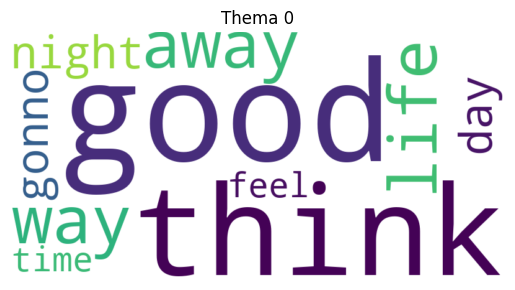

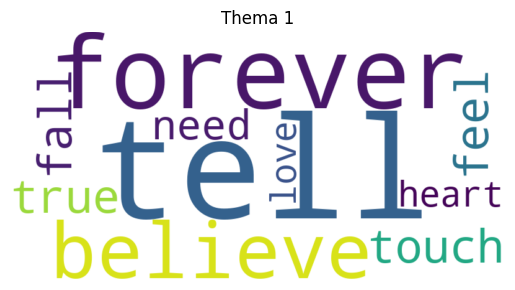

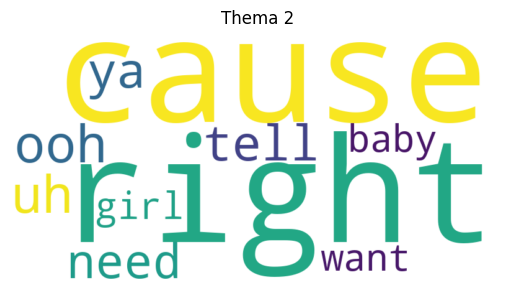

In [40]:
import matplotlib.pyplot as plt
from wordcloud import WordCloud

# Word Clouds für jedes Thema erstellen
for index, topic in enumerate(nmf_model.components_):
    plt.figure()
    wordcloud = WordCloud(width=800, height=400, background_color='white').generate(' '.join([vectorizer.get_feature_names_out()[i] for i in topic.argsort()[-10:]]))
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.axis('off')
    plt.title(f'Thema {index}')
    plt.savefig('Wordcloud_nmf_1')
    plt.show()


![Mein Plot](D:/_code/0_DA/Abschlussprojekt/data/wordcloud_nmf_1.png)

Hier ist es ein bisschen anders, Thema 0: positiv, alltägliches, Thema 2: Liebe, Thema 3: schmachtende Liebe

In [41]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.decomposition import NMF

# TF-IDF-Vektorisierung
vectorizer = TfidfVectorizer(max_df=0.95, min_df=150, stop_words='english')
tfidf = vectorizer.fit_transform(df3['processed_lyrics'])

# NMF-Modell erstellen
nmf_model = NMF(n_components=5, random_state=1)
nmf_model.fit(tfidf)

# Themen anzeigen
for index, topic in enumerate(nmf_model.components_):
    print(f'Thema {index}:')
    print(" ".join([vectorizer.get_feature_names_out()[i] for i in topic.argsort()[-10:]]))


Thema 0:
good way think life away night day gonno feel time
Thema 1:
tell believe forever feel touch fall true need heart love
Thema 2:
need right little good girl ya let come ooh baby
Thema 3:
body uh ya cause feel somebody tell need girl want
Thema 4:
everybody man huh whoa dance ya uh girl ah hey


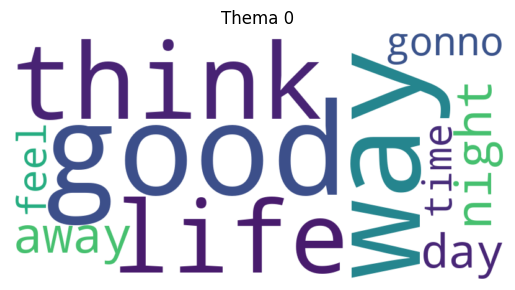

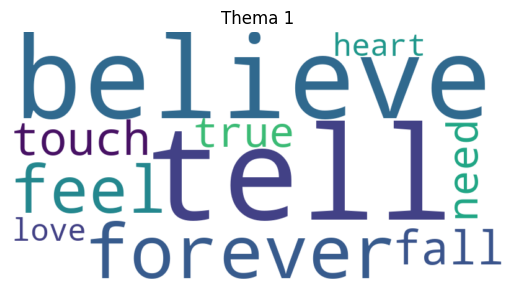

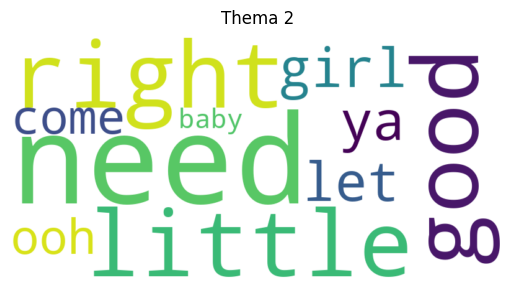

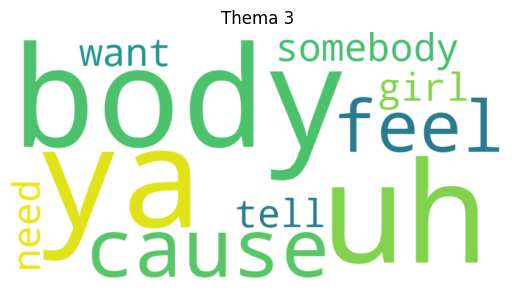

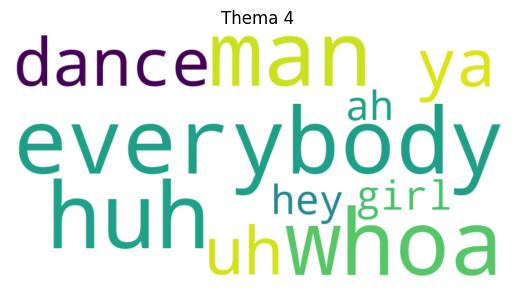

In [42]:
import matplotlib.pyplot as plt
from wordcloud import WordCloud

# Word Clouds für jedes Thema erstellen
for index, topic in enumerate(nmf_model.components_):
    plt.figure()
    wordcloud = WordCloud(width=800, height=400, background_color='white').generate(' '.join([vectorizer.get_feature_names_out()[i] for i in topic.argsort()[-10:]]))
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.axis('off')
    plt.title(f'Thema {index}')
    plt.savefig('Wordcloud_nmf_2')
    plt.show()


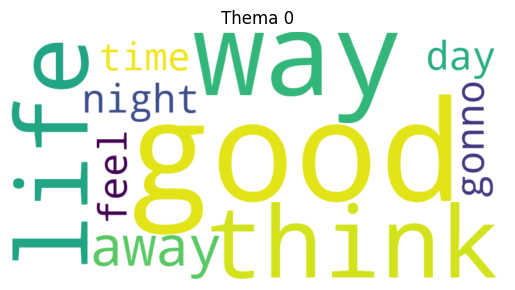

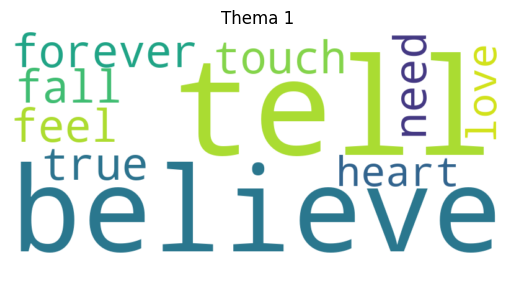

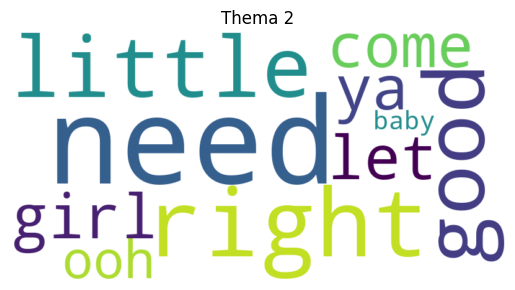

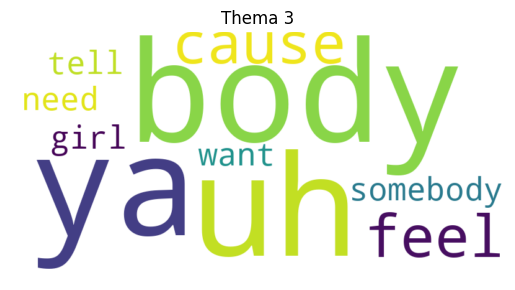

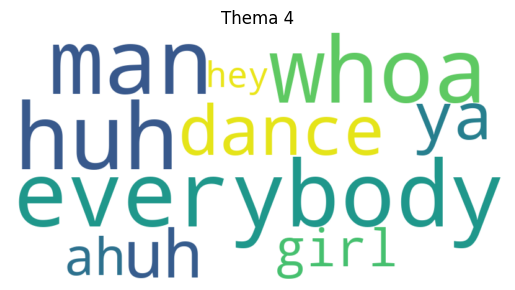

In [43]:
import matplotlib.pyplot as plt
from wordcloud import WordCloud

# Word Clouds für jedes Thema erstellen
for index, topic in enumerate(nmf_model.components_):
    plt.figure()
    wordcloud = WordCloud(width=800, height=400, background_color='white').generate(' '.join([vectorizer.get_feature_names_out()[i] for i in topic.argsort()[-10:]]))
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.axis('off')
    plt.title(f'Thema {index}')
    plt.savefig('Wordcloud_nmf_2')
    plt.show()


Hier fällt auf, dass Thema 0 sehr nah an dem Thema 0 von vorher dran ist. Thema 4 ist sehr körperlich

In [44]:
# from sklearn.feature_extraction.text import TfidfVectorizer
# from sklearn.decomposition import NMF

# # TF-IDF-Vektorisierung
# vectorizer = TfidfVectorizer(max_df=0.95, min_df=20, stop_words='english')
# tfidf = vectorizer.fit_transform(df3['processed_lyrics'])

# # NMF-Modell erstellen
# nmf_model = NMF(n_components=10, random_state=1)
# nmf_model.fit(tfidf)

# # Themen anzeigen
# for index, topic in enumerate(nmf_model.components_):
#     print(f'Thema {index}:')
#     print(" ".join([vectorizer.get_feature_names_out()[i] for i in topic.argsort()[-10:]]))


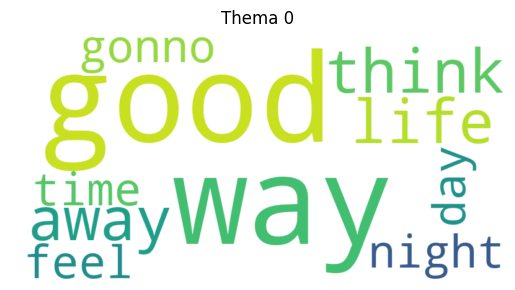

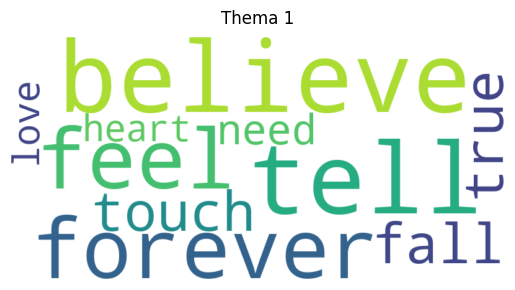

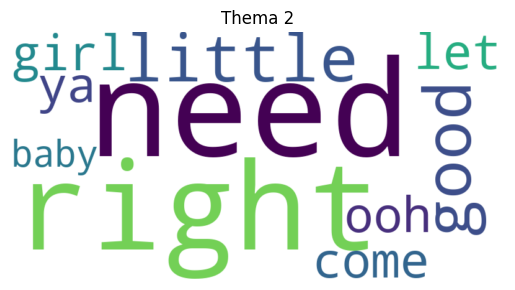

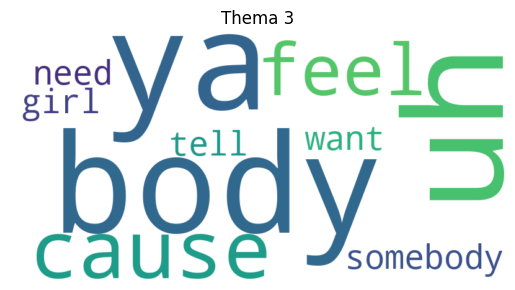

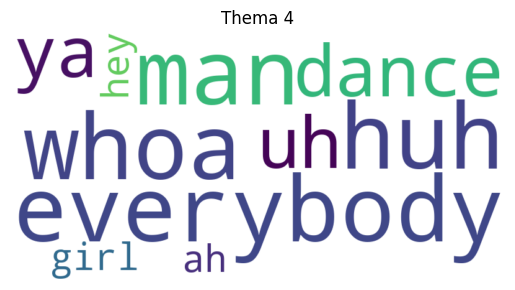

In [45]:
import matplotlib.pyplot as plt
from wordcloud import WordCloud

# Word Clouds für jedes Thema erstellen
for index, topic in enumerate(nmf_model.components_):
    plt.figure()
    wordcloud = WordCloud(width=800, height=400, background_color='white').generate(' '.join([vectorizer.get_feature_names_out()[i] for i in topic.argsort()[-10:]]))
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.axis('off')
    plt.title(f'Thema {index}')
    plt.savefig('Wordcloud_nmf_3.png')
    plt.show()


![Mein Plot](D:/_code/0_DA/Abschlussprojekt/data/Wordcloud_nmf_3.png)

Auch hier ist Thema 0 sehr ähnlich wie bei den vorherigen Analysen, wahrscheinlich sind es die häufigsten Wörter. 
Dann kommt viel Liebe, aner in Themen 4 und 5 fällt auf, dass ein Wörter wie murder und dark eingestreut sind
Thema 6 ist ein Füllwort-Thema
In Thema 7 geht es vielleicht um Beschreibungen von Äußerlichkeiten
Thema 8 kümmert sich um Bewegung
Thema 9 um Party

Die Ergebnisse dieser Analyse sind noch mal anders und in sich etwas stabiler, dafür anfälliger für kleine Wörter.

Wenn wir die Themen miteinander vergleichen, fällt auf, dass...

## N-Gramme

Schauen wir uns noch die N-Gramme an, also Verbindungen von n-Worten, die miteinander zusammenhängen.

In [46]:
import warnings

# Ignoriere FutureWarnings
warnings.simplefilter(action='ignore', category=FutureWarning)

Häufigste 2-Gramme: [(('love', 'love'), 3496), (('get', 'to'), 2811), (('ah', 'ah'), 2378), (('hey', 'hey'), 1953), (('want', 'want'), 1913), (('da', 'da'), 1626), (('doo', 'doo'), 1245), (('baby', 'baby'), 1003), (('uh', 'uh'), 981), (('whoa', 'whoa'), 965), (('low', 'low'), 830), (('uh', 'huh'), 789), (('shake', 'shake'), 771), (('ha', 'ha'), 769), (('way', 'way'), 717), (('feel', 'good'), 710), (('want', 'love'), 701), (('good', 'good'), 695), (('little', 'bit'), 663), (('run', 'away'), 643), (('get', 'get'), 629), (('time', 'time'), 586), (('eh', 'eh'), 585), (('run', 'run'), 584), (('dance', 'dance'), 583), (('love', 'want'), 559), (('fall', 'love'), 548), (('ya', 'ya'), 544), (('feel', 'feel'), 536), (('love', 'baby'), 521), (('need', 'need'), 515), (('break', 'heart'), 512), (('Got', 'to'), 509), (('noh', 'noh'), 506), (('walk', 'walk'), 499), (('be', 'get'), 497), (('work', 'work'), 474), (('lie', 'lie'), 468), (('good', 'time'), 466), (('love', 'feel'), 462), (('ba', 'ba'), 45

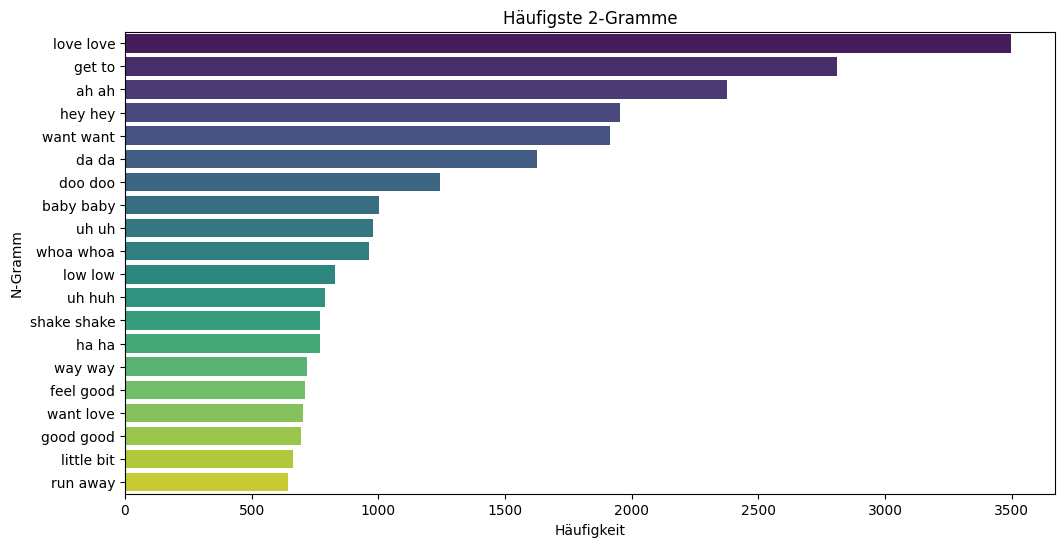

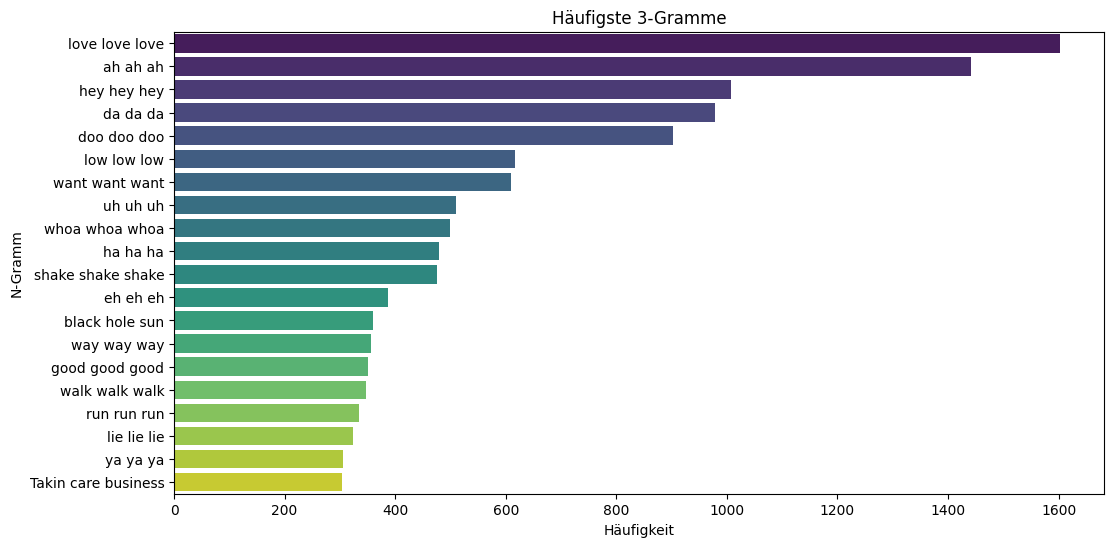

In [47]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from collections import Counter
from nltk import ngrams  # Importiere die ngrams-Funktion

def get_ngrams(text_series, n):
    all_ngrams = []
    for text in text_series:
        tokens = text.split()
        n_grams = ngrams(tokens, n)
        all_ngrams.extend(n_grams)
    return Counter(all_ngrams).most_common(100)  # Die 100 häufigsten N-Gramme

# Beispiel für 2-Gramme
top_bigrams = get_ngrams(df3['processed_lyrics'], 2)
print("Häufigste 2-Gramme:", top_bigrams)

# Beispiel für 3-Gramme
top_trigrams = get_ngrams(df3['processed_lyrics'], 3)
print("Häufigste 3-Gramme:", top_trigrams)

# Funktion zur Visualisierung der N-Gramme
def plot_ngrams(ngrams_list, title):
    ngrams_df = pd.DataFrame(ngrams_list, columns=['N-Gram', 'Frequency'])
    ngrams_df['N-Gram'] = ngrams_df['N-Gram'].apply(lambda x: ' '.join(x))  # N-Gramme in Strings umwandeln

    plt.figure(figsize=(12, 6))
    sns.barplot(x='Frequency', y='N-Gram', data=ngrams_df.head(20), palette='viridis')
    plt.title(title)
    plt.xlabel('Häufigkeit')
    plt.ylabel('N-Gramm')
    plt.show()

# Visualisierung der häufigsten 2-Gramme
plot_ngrams(top_bigrams, 'Häufigste 2-Gramme')
print()
# Visualisierung der häufigsten 3-Gramme
plot_ngrams(top_trigrams, 'Häufigste 3-Gramme')


Häufigste 2-Gramme: 

[(('love', 'love'), 3496), (('get', 'to'), 2811), (('ah', 'ah'), 2378), (('hey', 'hey'), 1953), (('want', 'want'), 1913), (('da', 'da'), 1626), (('doo', 'doo'), 1245), (('baby', 'baby'), 1003), (('uh', 'uh'), 981), (('whoa', 'whoa'), 965), (('low', 'low'), 830), (('uh', 'huh'), 789), (('shake', 'shake'), 771), (('ha', 'ha'), 769), (('way', 'way'), 717), (('feel', 'good'), 710), (('want', 'love'), 701), (('good', 'good'), 695), (('little', 'bit'), 663), (('run', 'away'), 643), (('get', 'get'), 629), (('time', 'time'), 586), (('eh', 'eh'), 585), (('run', 'run'), 584), (('dance', 'dance'), 583), (('love', 'want'), 559), (('fall', 'love'), 548), (('ya', 'ya'), 544), (('feel', 'feel'), 536), (('love', 'baby'), 521), (('need', 'need'), 515), (('break', 'heart'), 512), (('Got', 'to'), 509), (('noh', 'noh'), 506), (('walk', 'walk'), 499), (('be', 'get'), 497), (('work', 'work'), 474), (('lie', 'lie'), 468), (('good', 'time'), 466), (('love', 'feel'), 462), (('ba', 'ba'), 456), (('care', 'business'), 448), (('night', 'night'), 439), (('need', 'love'), 439), (('come', 'come'), 439), (('baby', 'want'), 430), (('baby', 'love'), 425), (('close', 'eye'), 418), (('right', 'right'), 413), (('girl', 'girl'), 407), (('go', 'go'), 403), (('night', 'long'), 396), (('jump', 'jump'), 396), (('tell', 'tell'), 390), (('boom', 'boom'), 389), (('black', 'hole'), 385), (('girl', 'want'), 382), (('ay', 'ay'), 377), (('miss', 'miss'), 377), (('woah', 'woah'), 366), (('look', 'eye'), 364), (('hole', 'sun'), 360), (('hold', 'tight'), 358), (('way', 'love'), 355), (('lose', 'control'), 349), (('feel', 'way'), 348), (('want', 'dance'), 346), (('walk', 'away'), 345), (('hold', 'hold'), 344), (('love', 'get'), 342), (('heart', 'beat'), 341), (('love', 'need'), 334), (('alright', 'alright'), 333), (('wait', 'wait'), 332), (('want', 'feel'), 332), (('good', 'friend'), 330), (('want', 'get'), 329), (("'cause", 'want'), 328), (('way', 'feel'), 324), (('baby', 'get'), 322), (('love', 'way'), 322), (('got', 'to'), 321), (('La', 'La'), 321), (('feel', 'love'), 320), (('burn', 'burn'), 318), (("'cause", 'get'), 316), (('look', 'look'), 316), (('mm', 'mm'), 314), (('ba', 'da'), 314), (('live', 'life'), 311), (('way', 'want'), 310), (('away', 'away'), 309), (('stop', 'stop'), 309), (('da', 'ba'), 308), (('Takin', 'care'), 304), (('come', 'baby'), 302), (('day', 'day'), 296), (('find', 'way'), 294), (('think', 'think'), 294), (('to', 'get'), 294)]

Häufigste 3-Gramme: 

[(('love', 'love', 'love'), 1602), (('ah', 'ah', 'ah'), 1441), (('hey', 'hey', 'hey'), 1008), (('da', 'da', 'da'), 978), (('doo', 'doo', 'doo'), 902), (('low', 'low', 'low'), 616), (('want', 'want', 'want'), 609), (('uh', 'uh', 'uh'), 510), (('whoa', 'whoa', 'whoa'), 500), (('ha', 'ha', 'ha'), 480), (('shake', 'shake', 'shake'), 475), (('eh', 'eh', 'eh'), 387), (('black', 'hole', 'sun'), 360), (('way', 'way', 'way'), 357), (('good', 'good', 'good'), 350), (('walk', 'walk', 'walk'), 347), (('run', 'run', 'run'), 335), (('lie', 'lie', 'lie'), 323), (('ya', 'ya', 'ya'), 305), (('Takin', 'care', 'business'), 304), (('Doo', 'doo', 'doo'), 292), (('work', 'work', 'work'), 287), (('to', 'get', 'to'), 283), (('baby', 'baby', 'baby'), 276), (('noh', 'noh', 'noh'), 272), (('uh', 'huh', 'uh'), 234), (('get', 'to', 'get'), 230), (('huh', 'uh', 'huh'), 228), (('hole', 'sun', 'will'), 228), (('jump', 'jump', 'jump'), 227), (('night', 'night', 'night'), 217), (('run', 'away', 'run'), 217), (('ba', 'ba', 'ba'), 213), (('ay', 'ay', 'ay'), 211), (('doo', 'doo', 'Doo'), 205), (('girl', 'girl', 'girl'), 204), (('come', 'come', 'come'), 200), (('mm', 'mm', 'mm'), 199), (('away', 'run', 'away'), 196), (('Da', 'da', 'da'), 196), (('doo', 'Doo', 'doo'), 195), (('miss', 'miss', 'miss'), 193), (('dance', 'dance', 'dance'), 191), (('away', 'away', 'away'), 191), (('La', 'La', 'La'), 191), (('burn', 'burn', 'burn'), 183), (('hope', 'give', 'hell'), 174), (('woah', 'woah', 'woah'), 173), (('wish', 'wish', 'wish'), 169), (('ba', 'doom', 'boom'), 168), (('rumour', 'rumour', 'rumour'), 162), (('bop', 'bop', 'bop'), 161), (('sha', 'ba', 'da'), 160), (('bam', 'bam', 'bam'), 160), (('go', 'go', 'go'), 157), (('hold', 'hold', 'hold'), 156), (('time', 'time', 'time'), 155), (('fa', 'fa', 'fa'), 155), (('wait', 'wait', 'wait'), 153), (('want', 'love', 'want'), 151), (('get', 'get', 'get'), 151), (('Ba', 'ba', 'ba'), 150), (('bye', 'bye', 'bye'), 149), (('need', 'need', 'need'), 146), (('care', 'business', 'Takin'), 144), (('business', 'Takin', 'care'), 144), (('will', 'black', 'hole'), 144), (('tryin', 'tryin', 'tryin'), 144), (('bang', 'bang', 'bang'), 142), (('talk', 'talk', 'talk'), 139), (('something', "'bout", 'something'), 138), (("'bout", 'something', "'bout"), 138), (('alright', 'alright', 'alright'), 135), (('forever', 'forever', 'forever'), 130), (('sing', 'word', 'wrong'), 130), (('stop', 'stop', 'stop'), 129), (('feel', 'makin', 'love'), 129), (('Ooh', 'baby', 'baby'), 127), (('get', 'lump', 'throat'), 126), (('lump', 'throat', "'cause"), 126), (('throat', "'cause", 'gonno'), 126), (("'cause", 'gonno', 'sing'), 126), (('gonno', 'sing', 'word'), 126), (('halo', 'halo', 'halo'), 120), (('want', 'ya', 'want'), 120), (('hole', 'sun', 'black'), 120), (('sun', 'black', 'hole'), 120), (('Na', 'Na', 'Na'), 119), (('hmm', 'hmm', 'hmm'), 119), (('du', 'du', 'du'), 119), (('way', 'love', 'go'), 118), (('Ah', 'ah', 'ah'), 117), (('hoo', 'hoo', 'hoo'), 117), (('turn', 'turn', 'turn'), 117), (('well', 'well', 'well'), 112), (('Ooh', 'Ooh', 'Ooh'), 112), (('ba', 'dee', 'da'), 112), (('dee', 'da', 'ba'), 112), (('da', 'ba', 'di'), 112), (('takin', 'care', 'business'), 112)]

Bei den Bigrammen: Love, Want und Shake fallen mir auf.

Bei den Trigrammen: Auch hier sehen wir wieder: Love, Want, dann shake und black hole sun (ein Lied von Soundgarden), Bewegung ud positive Wörter und: Taking care of business.

Wir sehen also, dass die Themenanalyse teilweise gute zusammenhängende Worte produziert, aber von den vielen kleinen Worten abgelenkt wird. Manche Themen sind schwer zu fassen, da müsste man dann die Themenanalyse noch ein bisschen verändern - mehr Themen, weniger Themen, mehr Runden zum Trainieren, oder weniger, bis man eine gute Verteilung hat.

Viele auffällige N-Gramme haben wir allerdings nicht gefunden, hauptsächlich Wiederholungen.

## Sentimentanalyse

Im Folgenden betrachten wir noch die Stimmung des Textes. Dafür benutzen wir VADER (Valence Aware Dictionary and sEntiment Reasoner). 

Die Bibliothek benutzt ein vordefiniertes Wörterbuch und sucht nach bekannten Wörtern. Diesen wird ein Wert zwischen -1 und +1 zugeordnet. Auch die Satzstruktur wird analysiert, so dass zum Beispiel ein "nicht" vor einem positiven Wort beachtet wird.

In [48]:
#!pip install vaderSentiment

In [49]:
import pandas as pd
#import spacy
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer

# # Lade das große mittlere Modell
# nlp = spacy.load('en_core_web_md')

# def preprocess_text(text):
#     text = text.replace('wanna', 'want').replace('na', 'no').replace("'cause", 'because')
#     doc = nlp(text)
#     return ' '.join([token.lemma_ for token in doc if not token.is_stop and not token.is_punct])

# # Vorverarbeitung der Lyrics
# df3['processed_lyrics'] = df3['lyrics'].apply(preprocess_text)

# Initialisiere den VADER Sentiment-Analyzer
analyzer = SentimentIntensityAnalyzer()

# Funktion zur Berechnung des Sentiments
def get_sentiment_vader(text):
    sentiment = analyzer.polarity_scores(text)
    return sentiment['compound']  # Gibt einen Wert zwischen -1 und 1 zurück

# Berechne das Sentiment für die vorverarbeiteten Lyrics
df3['sentiment'] = df3['processed_lyrics'].apply(get_sentiment_vader)

# Ergebnisse anzeigen
print(df3[['Track Name', 'sentiment']].head())


                             Track Name  sentiment
0                                Sherry     0.9918
1   I Took A Pill In Ibiza - Seeb Remix    -0.9989
2                    Let Go for Tonight     0.9814
3           The Way I Want To Touch You     0.9904
4  Still Got Time (feat. PARTYNEXTDOOR)     0.9786


In [50]:
positive_count = (df3['sentiment'] > 0).sum()
negative_count = (df3['sentiment'] < 0).sum()
neutral_count = ((df3['sentiment'] >= -0.75) & (df3['sentiment'] <= 0.75)).sum()

# Ergebnisse ausgeben
print(f"Anzahl der positiven Werte: {positive_count}")
print(f"Anzahl der negativen Werte: {negative_count}")
print(f"Anzahl der neutralen Werte: {neutral_count}")

Anzahl der positiven Werte: 4460
Anzahl der negativen Werte: 1496
Anzahl der neutralen Werte: 779


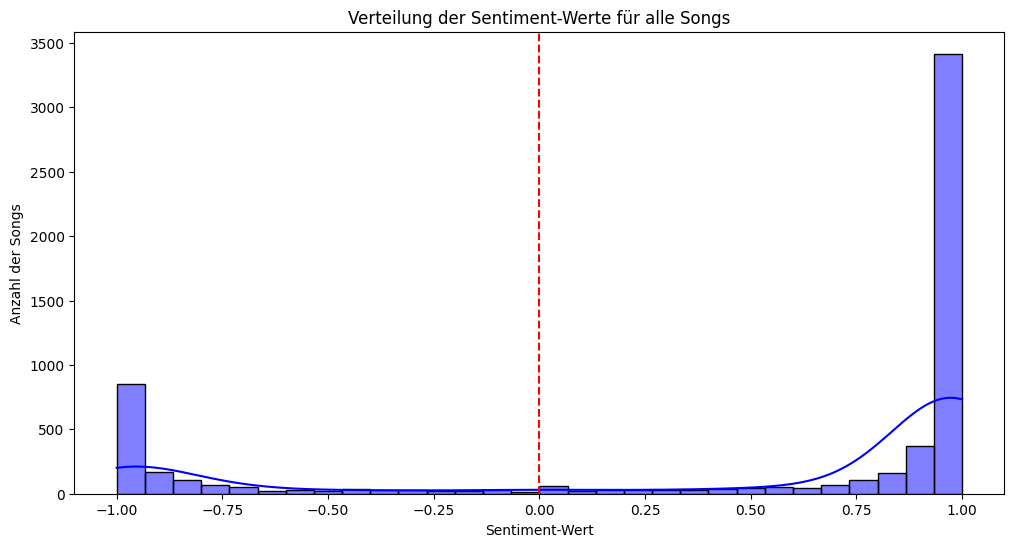

In [51]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Angenommen, df3 ist dein DataFrame mit den Spalten 'sentiment' und 'Artist Genres'

# Allgemeine Sentiment-Visualisierung (Histogramm)
plt.figure(figsize=(12, 6))
sns.histplot(df3['sentiment'], bins=30, kde=True, color='blue')
plt.title('Verteilung der Sentiment-Werte für alle Songs')
plt.xlabel('Sentiment-Wert')
plt.ylabel('Anzahl der Songs')
plt.axvline(x=0, color='red', linestyle='--')  # Linie für neutralen Wert
plt.savefig('sentiment.png')
plt.show()

#![Mein Plot](D:/_code/0_DA/Abschlussprojekt/data/sentiment.png)

Die Sentimentanalyse zeigt einen klaren Überhang von positivem Text. 4460 Songs sind über dem Wert von 0.75, nur 779 unter -0.75.

## Fazit

Wir haben einiges an Texten und Themen erkennen können, insgesamt sind die 10.000 ausgewählten Songs ziemlich positiv, oft geht es vor Allem um Liebe, aber auch um Bewegung, Tanzen und Party in den Texten. 

Wir haben gesehen, dass die NMF Analyse weniger Schwankungsanfällig ist und ziemlich gut unterschiedliche Themen herausgefunden hat. 
Wir haben auch gesehen, dass die LDA Analyse teilweise gut voneinander entfernte Cluster bilden konnte und somit auch unterschiedliche Themen gefunden hat. 
Wir haben gesehen, dass es sehr wichtig ist, die richtigen Filter einzusetzen, um unerwünschte Wörter auszublenden, damit sie die Werte nicht verfälschen.

Besonders spannend wäre es, diese Ergebnisse jetzt gegen die sehr große Stichprobe von noch 720.000 Songs von df2 zu stellen, leider ist mein Computer zur Bearbeitung dieser großen Kapazitäten nicht in der Lage. 